In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.simulation import Simulation
from sklearn.linear_model import LinearRegression

### Simulação

In [2]:
nparticles = 100
radii = np.ones(nparticles)*0.01

styles = {'linewidth': .1, 'fill': None}
sim = Simulation(nparticles, radii, styles, prob = 0.9)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]


Gerando o gif


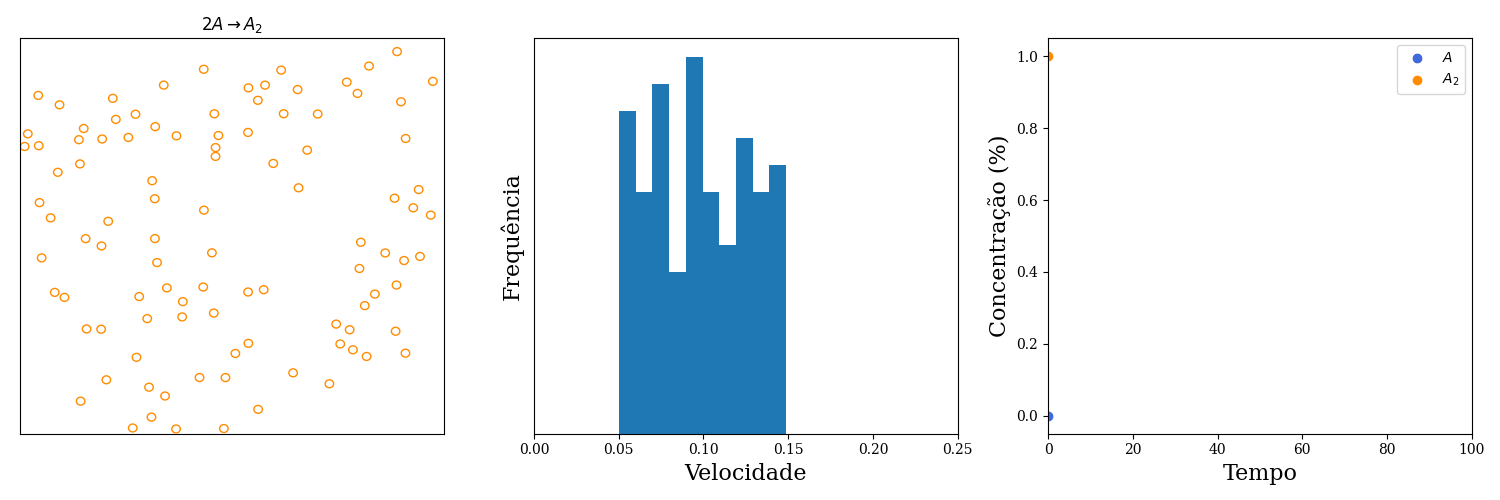

0.0350727544200101

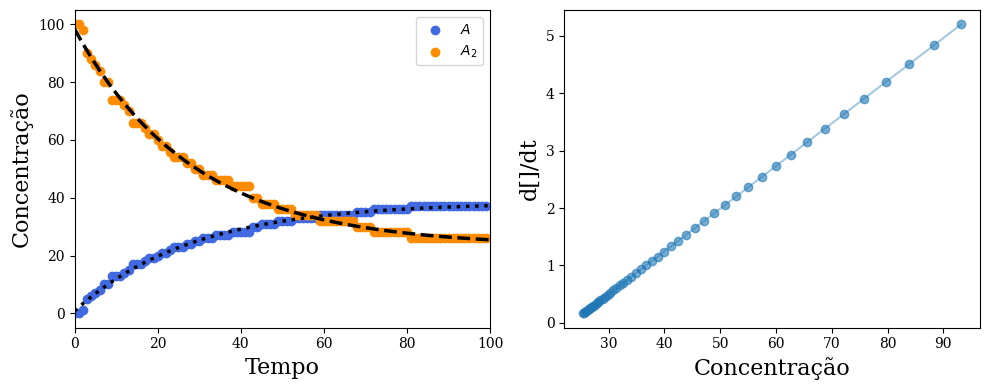

In [3]:
sim.run(frames=100)

### Análise $k$

In [5]:
nparticles = 100
radii = np.ones(nparticles)*0.01
styles = {'linewidth': .1, 'fill': None}

In [6]:
probs = [0,.1,.2,.3,.4,.5,.6,.7,.8,1]
k_list = []

for p in probs:
    
    sim = Simulation(nparticles, radii, styles, prob = p)
    k = sim.run(frames=30,display_gif=False,display_fit=False,save_gif=False)
    k_list.append(k)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:21<00:00,  1.41it/s]


In [9]:
# X, y = np.array(probs[1:]).reshape(-1, 1), np.array(k_list[1:])
X, y = np.array(probs).reshape(-1, 1), np.array(k_list)

model = LinearRegression()
model.fit(X,y)

slope = model.coef_[0]
intercept = model.intercept_

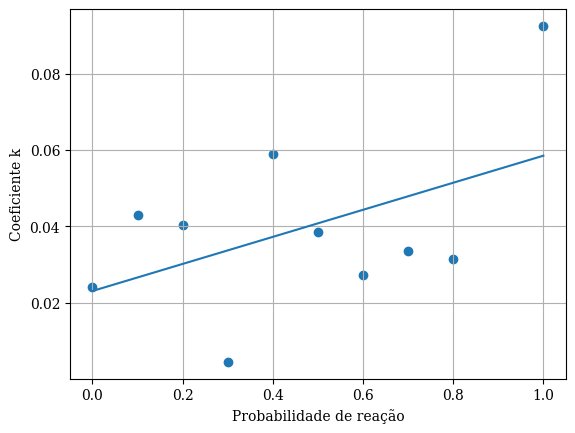

In [10]:
X = np.linspace(X[0],X[-1] )
plt.plot(X, model.predict(X))

plt.scatter(probs[:],k_list[:])
plt.xlabel('Probabilidade de reação'),plt.ylabel('Coeficiente k')
plt.grid()